In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import os
import cv2
import pandas as pd
from tensorflow.keras.models import Sequential, load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.ensemble import RandomForestClassifier


C:\Users\Dell\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
IMG_SIZE = 100
data = []
input_path = []
label = []
DATADIR = r'C:\Users\Dell\Desktop\majorproject\imgdataset'
CATEGORIES = ['Bacterial leaf spot','Healthy','Leaf Spot','Mosaicvirus','Powdery mildew']
for x, category in enumerate(CATEGORIES):
    path = os.path.join(DATADIR, category)
    #print(path)
    for img in os.listdir(path):
        #print(img)
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path)
        img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
        #img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
        data.append([img_arr, x])
        input_path.append(category)
        label.append(x)

In [4]:
x = np.array([features for features, _ in data])
y = np.array(label)

In [5]:
x=x/255.0

In [6]:
len(data)

2714

In [7]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [8]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,Healthy,1
1,Bacterial leaf spot,0
2,Healthy,1
3,Healthy,1
4,Leaf Spot,2


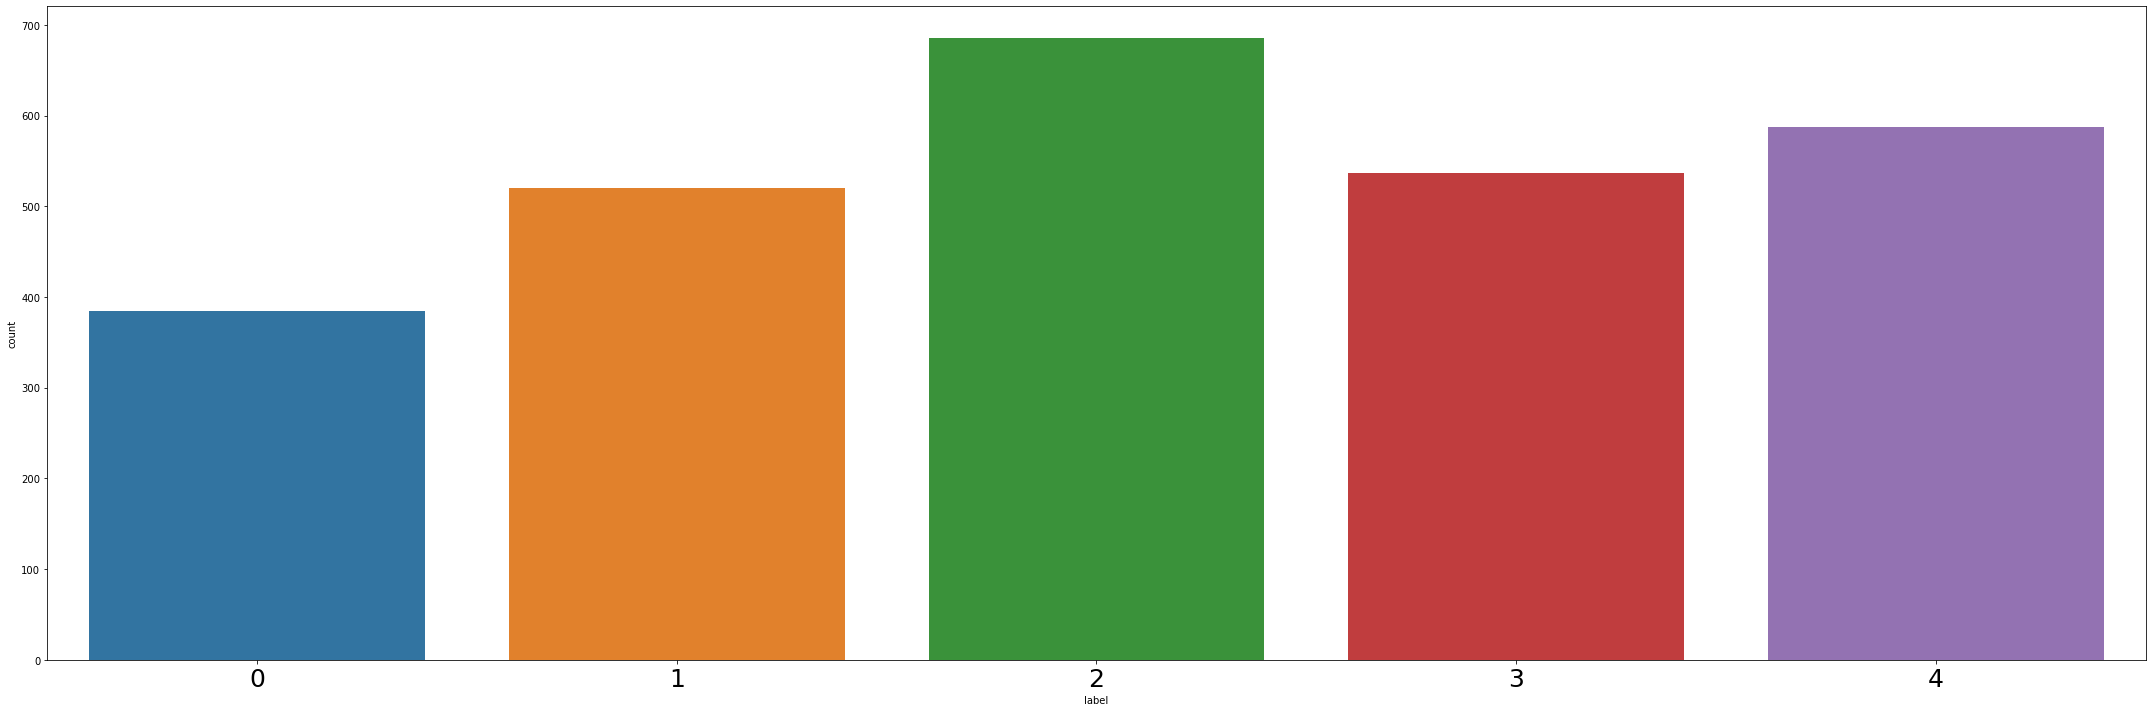

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,10)) 
ax=sns.countplot(x="label", data=df)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=25)
plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='label'>

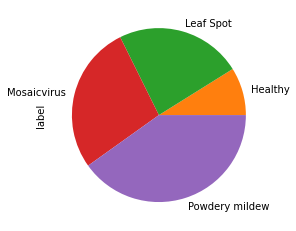

In [10]:
df.groupby('images').sum()['label'].plot.pie()

In [11]:
import random
random.shuffle(data)

In [12]:
import cv2

# Read the original image
img = cv2.imread(img_path)

# Display original image
cv2.imshow('Original', img)
cv2.waitKey(0)

# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 

# Sobel Edge Detection
sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) # Combined X and Y Sobel Edge Detection
laplacian = cv2.Laplacian(src=img_blur, ddepth=cv2.CV_64F)

# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)

cv2.waitKey(0)
cv2.imshow('Sobel Y', sobely)

cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)

cv2.waitKey(0)

# Canny Edge Detection
edges = cv2.Canny(image=img_blur, threshold1=100, threshold2=200) # Canny Edge Detection
# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)

cv2.waitKey(0)
cv2.imshow('Laplacian', laplacian)
plt.show()
cv2.destroyAllWindows()

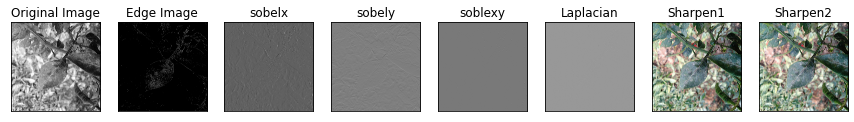

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from PIL import ImageFilter

img = cv2.imread(img_path,0)
edges = cv2.Canny(img,100,100)
new_image = cv2.Laplacian(src=img_blur, ddepth=cv2.CV_64F)
imageObject = Image.open(img_path);
imageObject.show();
sharpened1 = imageObject.filter(ImageFilter.SHARPEN);
sharpened2 = sharpened1.filter(ImageFilter.SHARPEN);
plt.figure(figsize=(15,10))

plt.subplot(181),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(182),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.subplot(183),plt.imshow(sobelx,cmap = 'gray')
plt.title('sobelx'), plt.xticks([]), plt.yticks([])

plt.subplot(184),plt.imshow(sobely,cmap = 'gray')
plt.title('sobely'), plt.xticks([]), plt.yticks([])

plt.subplot(185),plt.imshow(sobelxy,cmap = 'gray')
plt.title('soblexy'), plt.xticks([]), plt.yticks([])

plt.subplot(186), plt.imshow(new_image, cmap='gray'),plt.title('Laplacian')
plt.xticks([]), plt.yticks([])

plt.subplot(187), plt.imshow(sharpened1, cmap='gray'),plt.title('Sharpen1')
plt.xticks([]), plt.yticks([])

plt.subplot(188), plt.imshow(sharpened2, cmap='gray'),plt.title('Sharpen2')
plt.xticks([]), plt.yticks([])

plt.show()

(([], []), ([], []))

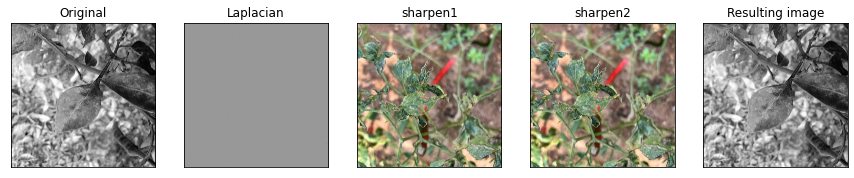

In [14]:
new_image = cv2.Laplacian(src=img_blur, ddepth=cv2.CV_64F)
img_path5 = os.path.join(r'C:\Users\Dell\Desktop\majorproject\imgdataset\Leaf Spot\3.jpg')
imageObject = Image.open(img_path5);
imageObject.show();
sharpened1 = imageObject.filter(ImageFilter.SHARPEN);
sharpened2 = sharpened1.filter(ImageFilter.SHARPEN);
plt.figure(figsize=(15,6))
plt.subplot(151), plt.imshow(img_blur, cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(152), plt.imshow(new_image, cmap='gray'),plt.title('Laplacian')
plt.xticks([]), plt.yticks([])
plt.subplot(153), plt.imshow(sharpened2, cmap='gray'),plt.title('sharpen1')
plt.xticks([]), plt.yticks([])
plt.subplot(154), plt.imshow(sharpened2, cmap='gray'),plt.title('sharpen2')
plt.xticks([]), plt.yticks([])
plt.subplot(155), plt.imshow(img_blur + new_image, cmap='gray'),plt.title('Resulting image')
plt.xticks([]), plt.yticks([])
#plt.show()

In [15]:
from PIL import Image
from PIL import ImageFilter

# Open an already existing image
imageObject = Image.open(img_path5);
#imageObject.show();

# Apply sharp filter
sharpened1 = imageObject.filter(ImageFilter.SHARPEN);
sharpened2 = sharpened1.filter(ImageFilter.SHARPEN);

# Show the sharpened images
#sharpened1.show();
#sharpened2.show();

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.callbacks import TensorBoard

In [17]:
model=Sequential()

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,input_shape=x.shape[1:],activation='relu'))

model.add(Dense(128,activation='relu'))

model.add(Dense(51,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#model.fit(x,y,epochs=5,validation_split=0.1,batch_size=10)

history = model.fit(x,y,epochs = 20,validation_split=0.1,verbose=1)
scores = model.evaluate(x,y,verbose=0)
print('\nTest Accuracy : %.2f%%' % scores[1])

C:\Users\Dell\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 232ms/step - accuracy: 0.3790 - loss: 1.7668 - val_accuracy: 0.0184 - val_loss: 2.1809
Epoch 2/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 18s 239ms/step - accuracy: 0.6287 - loss: 0.9114 - val_accuracy: 0.1765 - val_loss: 1.6230
Epoch 3/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 257ms/step - accuracy: 0.6388 - loss: 0.8455 - val_accuracy: 0.6176 - val_loss: 1.2115
Epoch 4/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 22s 283ms/step - accuracy: 0.7588 - loss: 0.6155 - val_accuracy: 0.3897 - val_loss: 1.7756
Epoch 5/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - accuracy: 0.8145 - loss: 0.5612 - val_accuracy: 0.4449 - val_loss: 2.0473
Epoch 6/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - accuracy: 0.8938 - loss: 0.3114 - val_accuracy: 0.4632 - val_loss: 2.8133
Epoch 7/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 21s 263ms/step - accuracy: 0.9184 - loss: 0.2350 - val_accuracy: 0.5074 - val_loss: 2.7953
Epoch 8/20
77/77 ━━━━━━━━━━━━━━━━━━━━ 19s 243ms/step - accuracy: 0.9822 - loss: 0.0753 - val_accu

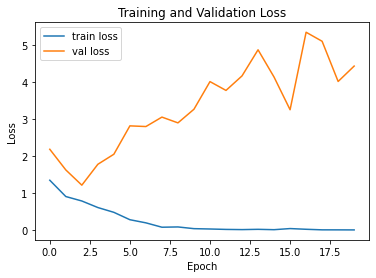

In [18]:
# Plot the loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.savefig('LossVal_loss.png')
plt.show()

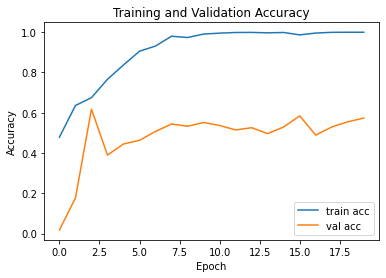

In [19]:
# Plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc.png')
plt.show()

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Assuming x_train, x_test, y_train, y_test are your training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape input data to match the expected shape of the model
x_train_reshaped = x_train.reshape(-1, 100, 100, 3)  # Reshape training data
x_test_reshaped = x_test.reshape(-1, 100, 100, 3)    # Reshape testing data

# Define the model architecture

# Train the model
history = model.fit(x_train_reshaped, y_train, epochs=20, validation_split=0.1, verbose=1)

# Predict on the training and testing sets
train_predictions = model.predict(x_train_reshaped)
test_predictions = model.predict(x_test_reshaped)

# Convert predictions to class labels
train_pred_labels = np.argmax(train_predictions, axis=1)
test_pred_labels = np.argmax(test_predictions, axis=1)

# Calculate metrics for the training dataset
train_accuracy = accuracy_score(y_train, train_pred_labels)
train_precision = precision_score(y_train, train_pred_labels, average='weighted')
train_recall = recall_score(y_train, train_pred_labels, average='weighted')
train_f1_score = f1_score(y_train, train_pred_labels, average='weighted')
train_confusion = confusion_matrix(y_train, train_pred_labels)

# Calculate metrics for the testing dataset
test_accuracy = accuracy_score(y_test, test_pred_labels)
test_precision = precision_score(y_test, test_pred_labels, average='weighted')
test_recall = recall_score(y_test, test_pred_labels, average='weighted')
test_f1_score = f1_score(y_test, test_pred_labels, average='weighted')
test_confusion = confusion_matrix(y_test, test_pred_labels)

# Print the metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1_score:.4f}")
print("Confusion Matrix:")
print(train_confusion)

print("\nTesting Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1_score:.4f}")
print("Confusion Matrix:")
print(test_confusion)


Epoch 1/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 279ms/step - accuracy: 0.9152 - loss: 0.3396 - val_accuracy: 0.9633 - val_loss: 0.1484
Epoch 2/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 256ms/step - accuracy: 0.9673 - loss: 0.1070 - val_accuracy: 0.9174 - val_loss: 0.2309
Epoch 3/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 16s 253ms/step - accuracy: 0.9979 - loss: 0.0239 - val_accuracy: 0.9817 - val_loss: 0.0855
Epoch 4/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - accuracy: 0.9888 - loss: 0.0274 - val_accuracy: 0.9771 - val_loss: 0.1054
Epoch 5/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step - accuracy: 0.9976 - loss: 0.0071 - val_accuracy: 0.9771 - val_loss: 0.1016
Epoch 6/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step - accuracy: 1.0000 - loss: 6.8123e-04 - val_accuracy: 0.9817 - val_loss: 0.0866
Epoch 7/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 224ms/step - accuracy: 1.0000 - loss: 3.0202e-04 - val_accuracy: 0.9817 - val_loss: 0.0936
Epoch 8/20
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 229ms/step - accuracy: 1.0000 - loss: 2.0044e-0

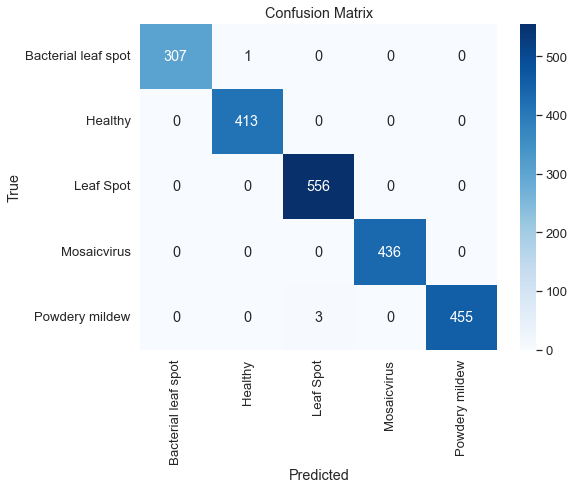

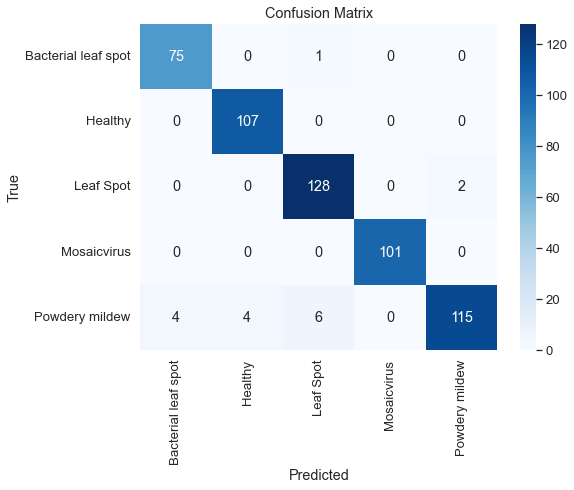

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_names = ['Bacterial leaf spot','Healthy','Leaf Spot','Mosaicvirus','Powdery mildew']

# Assuming train_true_labels, train_pred_labels, test_true_labels, and test_pred_labels are defined


def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(
        cm,
        annot=True,
        cmap='Blues',
        xticklabels=labels,
        yticklabels=labels,
        fmt='g'
    )
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot confusion matrix for training dataset
plot_confusion_matrix(train_confusion, class_names)

# Plot confusion matrix for testing dataset
plot_confusion_matrix(test_confusion, class_names)


In [22]:
model_json = model.to_json()
#model_json

In [23]:
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# Serialize weights to HDF5
model.save_weights("model_weights.weights.h5")

In [24]:
from tensorflow.keras.models import model_from_json
json_file = open('.\model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights(".\model_weights.weights.h5")
print("loaded from the disk")

loaded from the disk


In [25]:
import cv2
ds = []
r=cv2.imread(r"C:\Users\Dell\Desktop\majorproject\imgdataset\Leaf Spot\3.jpg")
#cv2.imshow('output',r)
r=cv2.resize(r,(100,100))
ds.append(r)

In [26]:
ds=np.array(ds)
ds.shape

(1, 100, 100, 3)

In [27]:
ds=ds/255
ds

array([[[[0.69019608, 0.81568627, 0.97647059],
         [0.60784314, 0.68235294, 0.7372549 ],
         [0.58431373, 0.63921569, 0.68627451],
         ...,
         [0.44705882, 0.5372549 , 0.59607843],
         [0.39215686, 0.56862745, 0.49803922],
         [0.36078431, 0.59215686, 0.4745098 ]],

        [[0.64705882, 0.76862745, 0.95686275],
         [0.55294118, 0.63529412, 0.72156863],
         [0.56862745, 0.64313725, 0.67058824],
         ...,
         [0.4627451 , 0.56078431, 0.50588235],
         [0.45490196, 0.63921569, 0.48627451],
         [0.4       , 0.62352941, 0.49803922]],

        [[0.61176471, 0.71764706, 0.89019608],
         [0.6       , 0.65882353, 0.76862745],
         [0.50588235, 0.60392157, 0.61176471],
         ...,
         [0.51764706, 0.62352941, 0.49019608],
         [0.53333333, 0.69803922, 0.50980392],
         [0.47843137, 0.65490196, 0.55294118]],

        ...,

        [[0.55686275, 0.61176471, 0.47843137],
         [0.31764706, 0.50588235, 0.40784314]

In [28]:
t=model.predict(ds)
print(CATEGORIES[np.argmax(t)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Leaf Spot


In [29]:
t=np.argmax(t)

In [30]:
print(CATEGORIES[t])

Leaf Spot


In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
import pandas as pd
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
# Flatten the CNN output for Random Forest input
x_train_flatten = model.predict(x_train)
x_test_flatten = model.predict(x_test)

68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


In [34]:
# Reshape y_train and y_test to match the shape of x_train_flatten and x_test_flatten
y_train_reshaped = y_train.reshape(-1, 1)  # Reshape to a column vector
y_test_reshaped = y_test.reshape(-1, 1)  # Reshape to a column vector
# Now you can use x_train_flatten, x_test_flatten, y_train_reshaped, and y_test_reshaped
# as inputs for your Random Forest classifier.


In [35]:
# Reshape the data for Random Forest
x_train_flatten = x_train_flatten.reshape(x_train_flatten.shape[0], -1)
x_test_flatten = x_test_flatten.reshape(x_test_flatten.shape[0], -1)



In [36]:
# Build Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_flatten, y_train_reshaped)



C:\Users\Dell\AppData\Local\Temp\ipykernel_964\2931988663.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train_flatten, y_train_reshaped)


RandomForestClassifier(random_state=42)

In [37]:
# Evaluate Random Forest model on test set
y_pred_rf = rf_model.predict(x_test_flatten)
accuracy_rf = accuracy_score(y_test_reshaped, y_pred_rf)
print('\nTest Accuracy (Random Forest): %.2f%%' % (accuracy_rf * 100))




Test Accuracy (Random Forest): 95.76%


In [38]:
# Display additional metrics for Random Forest
print('\nClassification Report (Random Forest):\n', classification_report(y_test_reshaped, y_pred_rf))
print('\nConfusion Matrix (Random Forest):\n', confusion_matrix(y_test_reshaped, y_pred_rf))




Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        76
           1       0.96      1.00      0.98       107
           2       0.95      0.93      0.94       130
           3       1.00      1.00      1.00       101
           4       0.93      0.90      0.91       129

    accuracy                           0.96       543
   macro avg       0.96      0.96      0.96       543
weighted avg       0.96      0.96      0.96       543


Confusion Matrix (Random Forest):
 [[ 75   0   1   0   0]
 [  0 107   0   0   0]
 [  0   0 121   0   9]
 [  0   0   0 101   0]
 [  4   4   5   0 116]]


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Define the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train_flatten, y_train_reshaped)

# Evaluate Decision Tree model on test set
y_pred_dt = dt_model.predict(x_test_flatten)
accuracy_dt = accuracy_score(y_test_reshaped, y_pred_dt)
print('\nTest Accuracy (Decision Tree): %.2f%%' % (accuracy_dt * 100))

# Display additional metrics for Decision Tree
print('\nClassification Report (Decision Tree):\n', classification_report(y_test_reshaped, y_pred_dt))
print('\nConfusion Matrix (Decision Tree):\n', confusion_matrix(y_test_reshaped, y_pred_dt))

# Define the KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_flatten, y_train_reshaped)

# Evaluate KNN model on test set
y_pred_knn = knn_model.predict(x_test_flatten)
accuracy_knn = accuracy_score(y_test_reshaped, y_pred_knn)
print('\nTest Accuracy (KNN): %.2f%%' % (accuracy_knn * 100))

# Display additional metrics for KNN
print('\nClassification Report (KNN):\n', classification_report(y_test_reshaped, y_pred_knn))
print('\nConfusion Matrix (KNN):\n', confusion_matrix(y_test_reshaped, y_pred_knn))



Test Accuracy (Decision Tree): 95.76%

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        76
           1       0.96      1.00      0.98       107
           2       0.95      0.94      0.95       130
           3       1.00      1.00      1.00       101
           4       0.93      0.89      0.91       129

    accuracy                           0.96       543
   macro avg       0.96      0.96      0.96       543
weighted avg       0.96      0.96      0.96       543


Confusion Matrix (Decision Tree):
 [[ 75   0   1   0   0]
 [  0 107   0   0   0]
 [  0   0 122   0   8]
 [  0   0   0 101   0]
 [  4   5   5   0 115]]

Test Accuracy (KNN): 96.87%

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        76
           1       0.96      1.00      0.98       107
           2       0.95      0.98      0.97       130
  

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [40]:
model = ['Decision_tree','Random_forest','Knn']
Accuracy = [0.9558,0.9669,0.9595]

In [41]:
df_metrics = pd.DataFrame(columns=['Model','Accuracy'])
df_metrics['Model'] = model
df_metrics['Accuracy'] = Accuracy

In [42]:
df_metrics

,Model,Accuracy
0,Decision_tree,0.9558
1,Random_forest,0.9669
2,Knn,0.9595


In [46]:
import numpy as np
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

# Assuming you have defined x_train, y_train, and x_test, y_test

model_list = [dt_model, rf_model, knn_model]

for model in model_list:
    print('Model:', model)
    epochs = 4

    # Lists to store loss values
    train_losses = []
    validation_losses = []

    # Training loop
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(len(x_train))
        x_train_shuffled, y_train_shuffled = x_train[indices], y_train[indices]

        # Train the model
        model.fit(x_train_shuffled, y_train_shuffled)

        # Calculate log loss on the training set
        train_preds = model.predict_proba(x_train_shuffled)
        train_loss = log_loss(y_train_shuffled, train_preds)
        train_losses.append(train_loss)

        # Calculate log loss on the validation set
        validation_preds = model.predict_proba(x_test)
        validation_loss = log_loss(y_test, validation_preds)
        validation_losses.append(validation_loss)

    # Plotting
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss', color='blue')
    plt.plot(range(1, epochs + 1), validation_losses, label='Validation Loss', color='orange')

    # Adding labels and title
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Over Epochs')

    # Adding a legend
    plt.legend()

    # Display the plot
    plt.show()


Model: DecisionTreeClassifier(random_state=42)


ValueError: Found array with dim 4. Estimator expected <= 2.

In [47]:
for model in model_list:    
    print('Model:',model)
    epochs = 4

    # Lists to store accuracy values
    train_accuracies = []
    test_accuracies = []

    # Training loop
    for epoch in range(epochs):
        # Shuffle the training data
        indices = np.random.permutation(len(x_train))
        x_train_shuffled, y_train_shuffled = x_train[indices], y_train[indices]

        # Train the model
        model.fit(x_train_shuffled, y_train_shuffled)

        # Calculate accuracy on the training set
        train_preds = model.predict(x_train_shuffled)
        train_accuracy = accuracy_score(y_train_shuffled, train_preds)
        train_accuracies.append(train_accuracy)

        # Calculate accuracy on the testing set
        test_preds = model.predict(x_test)
        test_accuracy = accuracy_score(y_test, test_preds)
        test_accuracies.append(test_accuracy)

    # Plotting
    plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy', color='blue')
    plt.plot(range(1, epochs + 1), test_accuracies, label='Testing Accuracy', color='orange')

    # Adding labels and title
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Testing Accuracy Over Epochs')

    # Adding a legend
    plt.legend()

    # Display the plot
    plt.show()

Model: DecisionTreeClassifier(random_state=42)


ValueError: Found array with dim 4. Estimator expected <= 2.

# VGG-16

In [51]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

# Create a VGG16 model with pre-trained weights on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create a custom head for classification
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax'))

In [52]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [53]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((60000, 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((10000, 28 * 28)).astype('float32') / 255

# Convert class vectors to binary class matrices
num_classes = 10
y_train = np.eye(num_classes)[y_train]
y_test = np.eye(num_classes)[y_test]

# Define your model
model = Sequential([
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

C:\Users\Dell\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8997 - loss: 0.3401 - val_accuracy: 0.9658 - val_loss: 0.1107
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9744 - loss: 0.0826 - val_accuracy: 0.9695 - val_loss: 0.0902
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9840 - loss: 0.0499 - val_accuracy: 0.9788 - val_loss: 0.0645
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9888 - loss: 0.0348 - val_accuracy: 0.9800 - val_loss: 0.0656
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9928 - loss: 0.0231 - val_accuracy: 0.9791 - val_loss: 0.0693
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9944 - loss: 0.0183 - val_accuracy: 0.9806 - val_loss: 0.0751
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.9803 - val_loss: 0.0836
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9958 - loss: 0.0128 - 

In [54]:
vgg16=model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9980 - loss: 0.0062 - val_accuracy: 0.9798 - val_loss: 0.1076
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9980 - loss: 0.0059 - val_accuracy: 0.9818 - val_loss: 0.1063
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9988 - loss: 0.0045 - val_accuracy: 0.9826 - val_loss: 0.1123
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9986 - loss: 0.0043 - val_accuracy: 0.9825 - val_loss: 0.1019
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9973 - loss: 0.0074 - val_accuracy: 0.9792 - val_loss: 0.1272
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9979 - loss: 0.0069 - val_accuracy: 0.9830 - val_loss: 0.1063
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9983 - loss: 0.0050 - val_accuracy: 0.9825 - val_loss: 0.1182
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9984 - loss: 0.0057 - 

In [55]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.reshape((60000, 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((10000, 28 * 28)).astype('float32') / 255

# Define your model
model = Sequential([
    Dense(512, activation='relu', input_shape=(28 * 28,)),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)

# Evaluate the model on your test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy*100:.2f}%")


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9016 - loss: 0.3364
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9759 - loss: 0.0807
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9840 - loss: 0.0528
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9889 - loss: 0.0345
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9919 - loss: 0.0251
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9749 - loss: 0.0882
Test accuracy: 97.88%


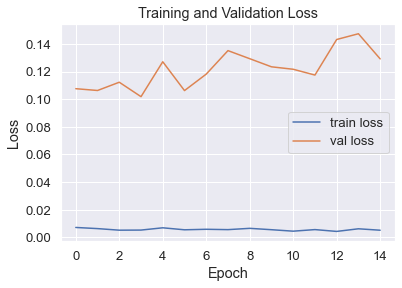

In [56]:
# Assuming you have already trained your model and stored the history in a variable named `vgg16`
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(vgg16.history['loss'], label='train loss')
plt.plot(vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()


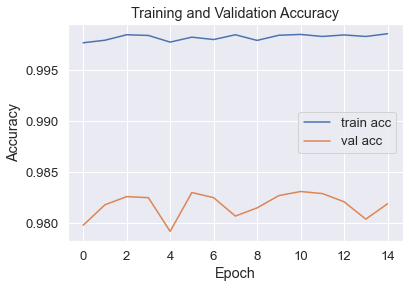

In [57]:
# Plot the accuracy
plt.plot(vgg16.history['accuracy'], label='train acc')
plt.plot(vgg16.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.savefig('AccVal_acc.png')
plt.show()